In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

449439

In [6]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

449439

In [8]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

58947

In [10]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

58947

In [12]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

436603

In [14]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

436603

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/vanilla_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 207s 14ms/step - loss: 0.0015 - mae: 0.0273 - mse: 0.0015 - val_loss: 0.0021 - val_mae: 0.0350 - val_mse: 0.0021
Epoch 2/50
14045/14045 [==============================] - 202s 14ms/step - loss: 9.5148e-04 - mae: 0.0222 - mse: 9.5148e-04 - val_loss: 0.0014 - val_mae: 0.0256 - val_mse: 0.0014
Epoch 3/50
14045/14045 [==============================] - 206s 15ms/step - loss: 8.6589e-04 - mae: 0.0212 - mse: 8.6589e-04 - val_loss: 0.0011 - val_mae: 0.0205 - val_mse: 0.0011
Epoch 4/50
14045/14045 [==============================] - 210s 15ms/step - loss: 8.4081e-04 - mae: 0.0208 - mse: 8.4081e-04 - val_loss: 0.0011 - val_mae: 0.0230 - val_mse: 0.0011
Epoch 5/50
14045/14045 [==============================] - 206s 15ms/step - loss: 8.1153e-04 - mae: 0.0204 - mse: 8.1153e-04 - val_loss: 9.6356e-04 - val_mae: 0.0202 - val_mse: 9.6356e-04
Epoch 6/50
14045/14045 [==============================] - 175s 12ms/step - loss: 8.0289e-04 - mae: 0.0203

13644/13644 [==============================] - 68s 5ms/step - loss: 0.0010 - mae: 0.0222 - mse: 0.0010
test loss, test acc: [0.0010076012695208192, 0.02223677560687065, 0.0010076012695208192]


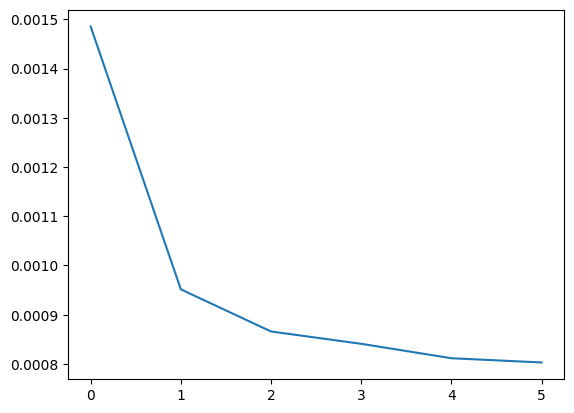

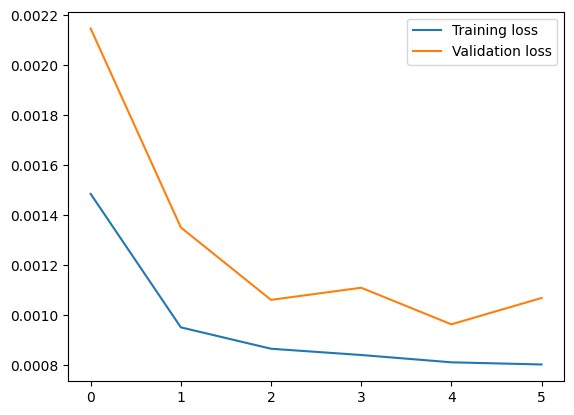

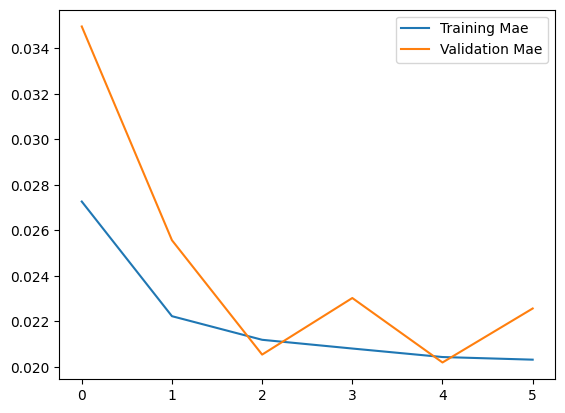

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 61s 4ms/step


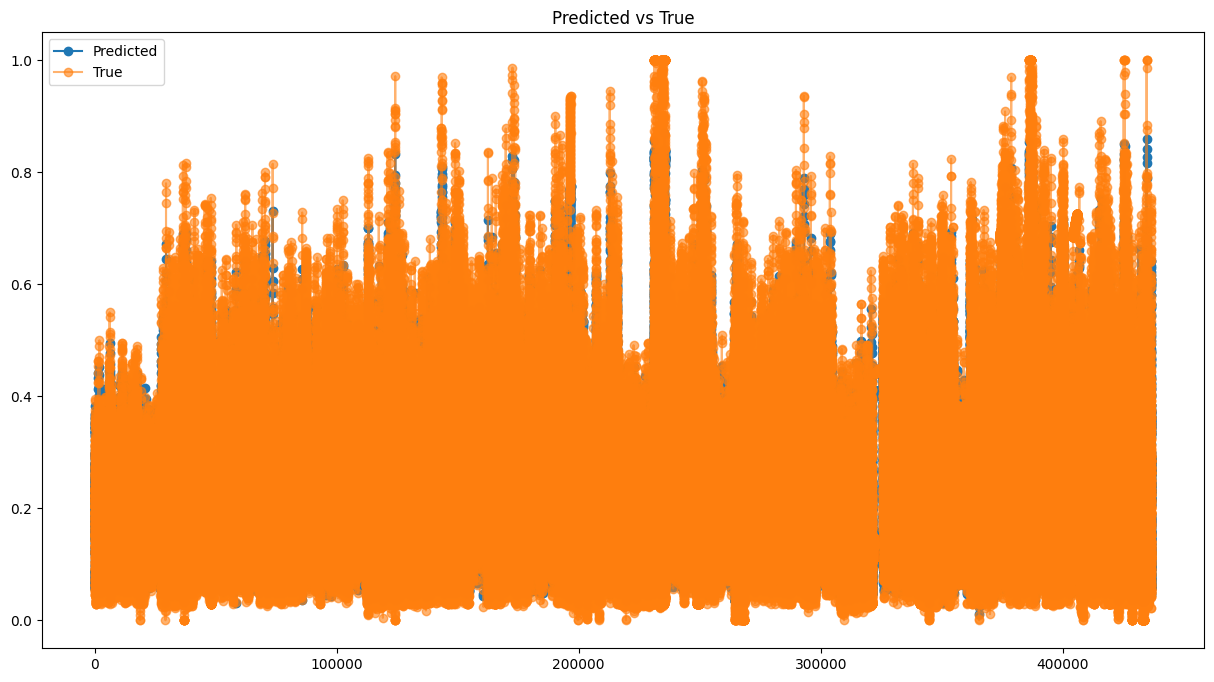

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.022236799413072137,
 'mse': 0.0317427357489313,
 'rmse': 0.001007601272826481}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/vanilla_NO_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 184s 13ms/step - loss: 3.2742e-04 - mae: 0.0109 - mse: 3.2742e-04 - val_loss: 2.3614e-04 - val_mae: 0.0104 - val_mse: 2.3614e-04
Epoch 2/50
14045/14045 [==============================] - 174s 12ms/step - loss: 1.7259e-04 - mae: 0.0081 - mse: 1.7259e-04 - val_loss: 1.9620e-04 - val_mae: 0.0087 - val_mse: 1.9620e-04
Epoch 3/50
14045/14045 [==============================] - 174s 12ms/step - loss: 1.6670e-04 - mae: 0.0078 - mse: 1.6670e-04 - val_loss: 1.9360e-04 - val_mae: 0.0085 - val_mse: 1.9360e-04
Epoch 4/50
14045/14045 [==============================] - 172s 12ms/step - loss: 1.6238e-04 - mae: 0.0077 - mse: 1.6238e-04 - val_loss: 1.9252e-04 - val_mae: 0.0085 - val_mse: 1.9252e-04
Epoch 5/50
14045/14045 [==============================] - 168s 12ms/step - loss: 1.6083e-04 - mae: 0.0076 - mse: 1.6083e-04 - val_loss: 1.9160e-04 - val_mae: 0.0084 - val_mse: 1.9160e-04


13644/13644 [==============================] - 63s 5ms/step - loss: 2.8976e-04 - mae: 0.0111 - mse: 2.8976e-04
test loss, test acc: [0.0002897647791542113, 0.011109460145235062, 0.0002897647791542113]


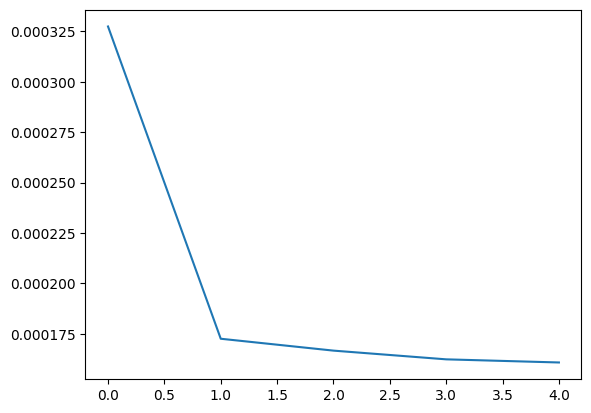

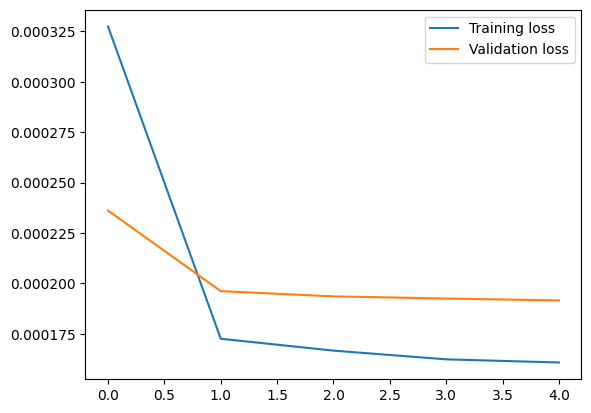

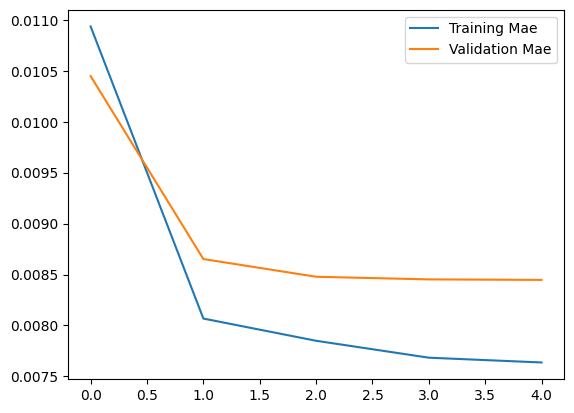

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 59s 4ms/step


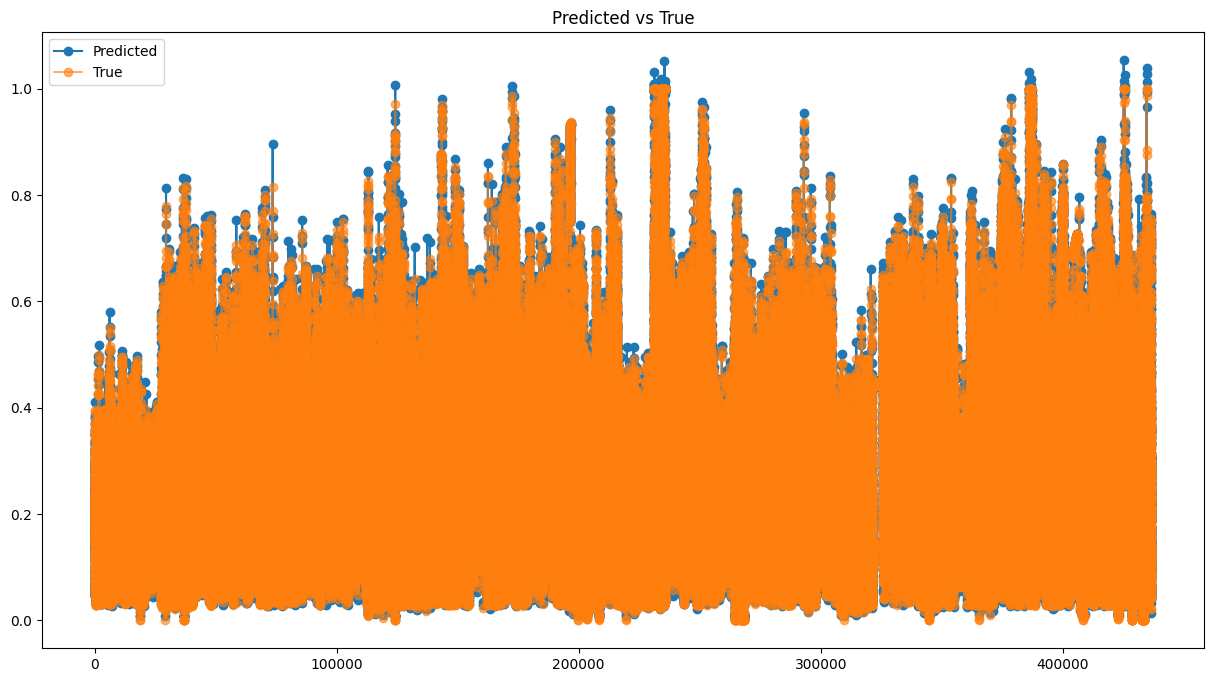

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.011109491316962011,
 'mse': 0.017022474403459734,
 'rmse': 0.0002897646348164418}

# Entrenamiento Stacked LSTM sin dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/stacked_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 337s 24ms/step - loss: 0.0015 - mae: 0.0271 - mse: 0.0015 - val_loss: 0.0025 - val_mae: 0.0356 - val_mse: 0.0025
Epoch 2/50
14045/14045 [==============================] - 348s 25ms/step - loss: 9.3159e-04 - mae: 0.0218 - mse: 9.3159e-04 - val_loss: 0.0018 - val_mae: 0.0318 - val_mse: 0.0018
Epoch 3/50
14045/14045 [==============================] - 363s 26ms/step - loss: 8.5740e-04 - mae: 0.0209 - mse: 8.5740e-04 - val_loss: 0.0011 - val_mae: 0.0265 - val_mse: 0.0011
Epoch 4/50
14045/14045 [==============================] - 399s 28ms/step - loss: 8.2295e-04 - mae: 0.0204 - mse: 8.2295e-04 - val_loss: 0.0017 - val_mae: 0.0330 - val_mse: 0.0017
Epoch 5/50
14045/14045 [==============================] - 405s 29ms/step - loss: 8.0950e-04 - mae: 0.0202 - mse: 8.0950e-04 - val_loss: 0.0016 - val_mae: 0.0338 - val_mse: 0.0016
Epoch 6/50
14045/14045 [==============================] - 408s 29ms/step - loss: 7.9325e-04 - mae: 0.0200 - mse: 

13644/13644 [==============================] - 153s 11ms/step - loss: 9.0227e-04 - mae: 0.0213 - mse: 9.0227e-04
test loss, test acc: [0.0009022664162330329, 0.021316060796380043, 0.0009022664162330329]


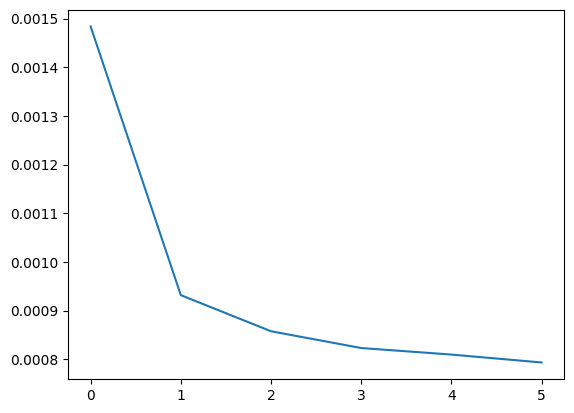

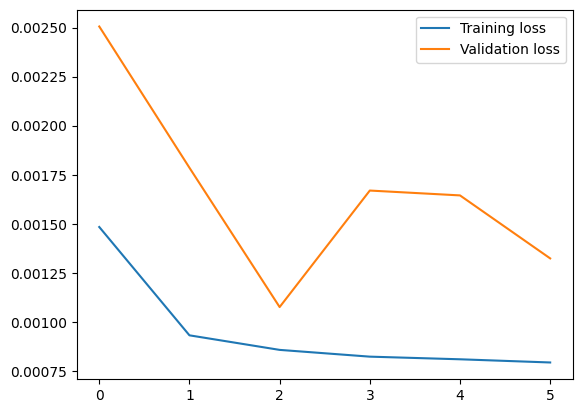

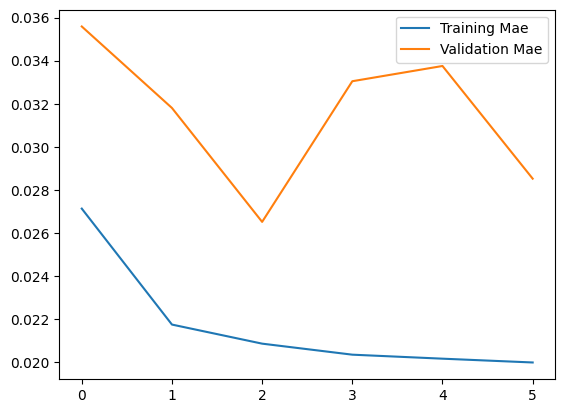

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 135s 10ms/step


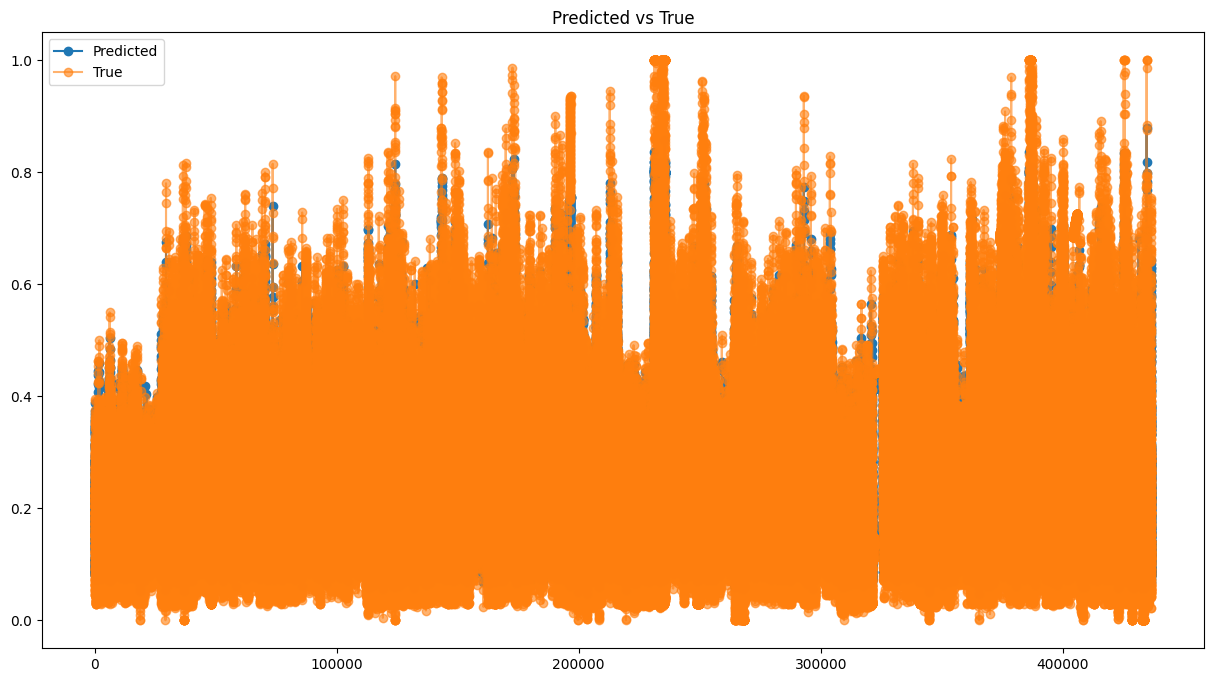

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.021316037152488684,
 'mse': 0.03003775612521867,
 'rmse': 0.0009022667930381117}

# Entrenamiento Stacked LSTM con dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/stacked_NO_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 409s 29ms/step - loss: 4.0751e-04 - mae: 0.0120 - mse: 4.0751e-04 - val_loss: 2.7174e-04 - val_mae: 0.0116 - val_mse: 2.7174e-04
Epoch 2/50
14045/14045 [==============================] - 397s 28ms/step - loss: 1.7933e-04 - mae: 0.0084 - mse: 1.7933e-04 - val_loss: 2.1507e-04 - val_mae: 0.0098 - val_mse: 2.1507e-04
Epoch 3/50
14045/14045 [==============================] - 394s 28ms/step - loss: 1.7079e-04 - mae: 0.0080 - mse: 1.7079e-04 - val_loss: 2.0135e-04 - val_mae: 0.0093 - val_mse: 2.0135e-04
Epoch 4/50
14045/14045 [==============================] - 393s 28ms/step - loss: 1.6736e-04 - mae: 0.0079 - mse: 1.6736e-04 - val_loss: 1.9160e-04 - val_mae: 0.0087 - val_mse: 1.9160e-04
Epoch 5/50
14045/14045 [==============================] - 391s 28ms/step - loss: 1.6599e-04 - mae: 0.0079 - mse: 1.6599e-04 - val_loss: 1.8729e-04 - val_mae: 0.0084 - val_mse: 1.8729e-04
Epoch 6/50
14045/14045 [==============================] - 397s 28

13644/13644 [==============================] - 119s 9ms/step - loss: 2.8102e-04 - mae: 0.0110 - mse: 2.8102e-04
test loss, test acc: [0.0002810167788993567, 0.01095108687877655, 0.0002810167788993567]


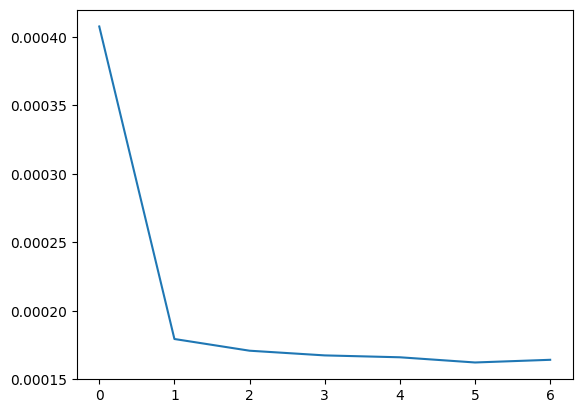

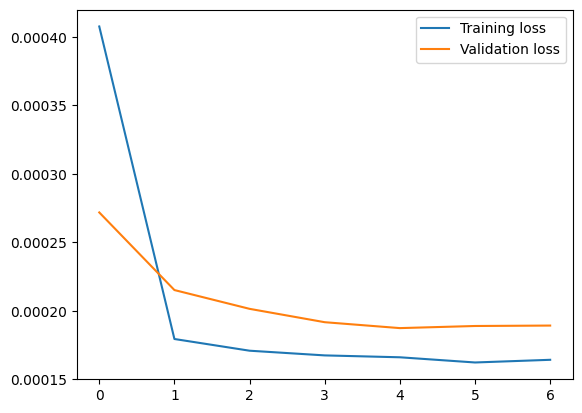

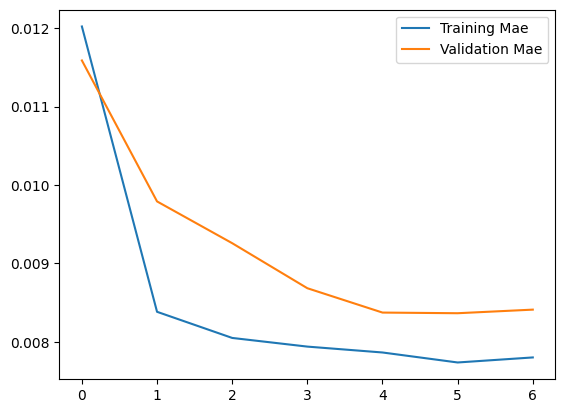

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 124s 9ms/step


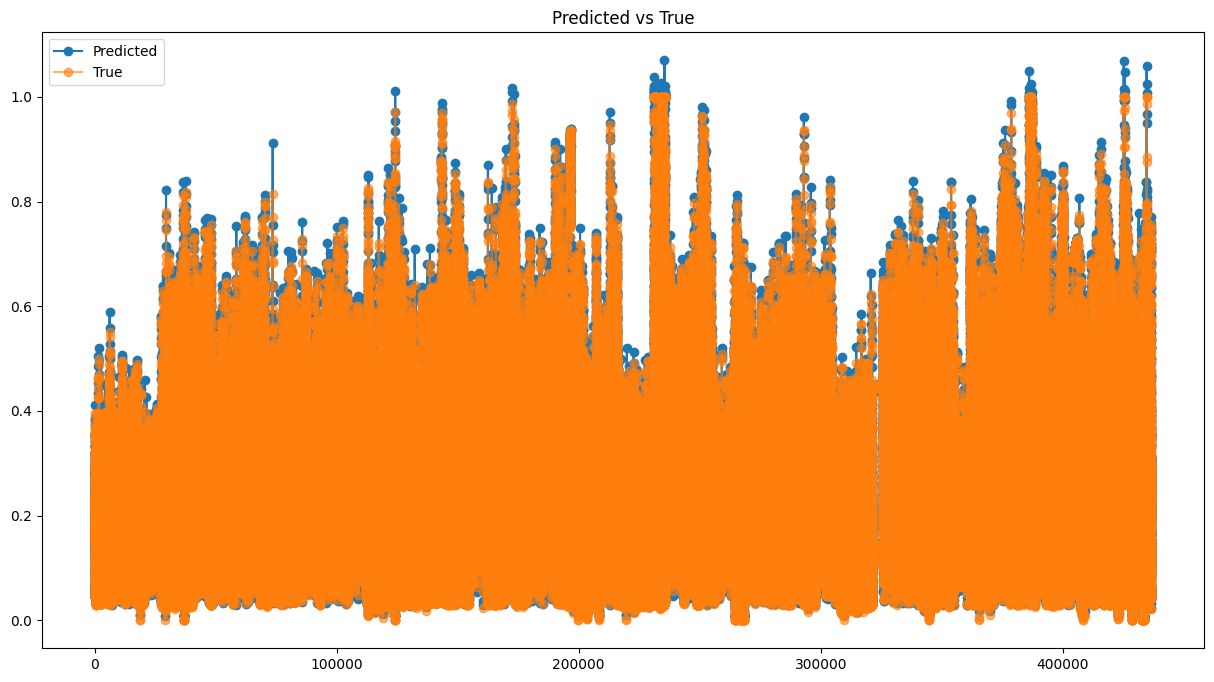

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.010951050714913485,
 'mse': 0.01676355748490644,
 'rmse': 0.00028101685954976267}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/bidirectional_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 244s 17ms/step - loss: 0.0015 - mae: 0.0278 - mse: 0.0015 - val_loss: 0.0011 - val_mae: 0.0274 - val_mse: 0.0011
Epoch 2/50
14045/14045 [==============================] - 236s 17ms/step - loss: 9.9963e-04 - mae: 0.0228 - mse: 9.9963e-04 - val_loss: 0.0014 - val_mae: 0.0300 - val_mse: 0.0014
Epoch 3/50
14045/14045 [==============================] - 240s 17ms/step - loss: 9.2995e-04 - mae: 0.0219 - mse: 9.2995e-04 - val_loss: 9.3987e-04 - val_mae: 0.0215 - val_mse: 9.3987e-04
Epoch 4/50
14045/14045 [==============================] - 256s 18ms/step - loss: 8.9229e-04 - mae: 0.0214 - mse: 8.9229e-04 - val_loss: 8.8719e-04 - val_mae: 0.0207 - val_mse: 8.8719e-04
Epoch 5/50
14045/14045 [==============================] - 355s 25ms/step - loss: 8.6846e-04 - mae: 0.0211 - mse: 8.6846e-04 - val_loss: 6.8767e-04 - val_mae: 0.0202 - val_mse: 6.8767e-04
Epoch 6/50
14045/14045 [==============================] - 379s 27ms/step - loss: 8.5105e-

13644/13644 [==============================] - 88s 6ms/step - loss: 6.3547e-04 - mae: 0.0174 - mse: 6.3547e-04
test loss, test acc: [0.0006354704964905977, 0.017355244606733322, 0.0006354704964905977]


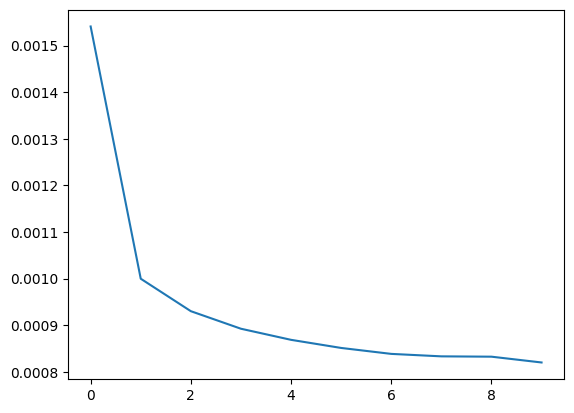

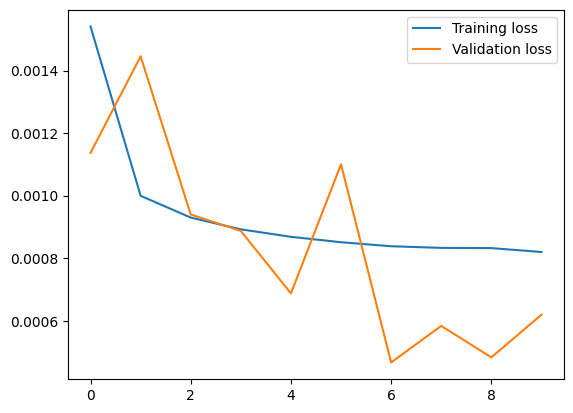

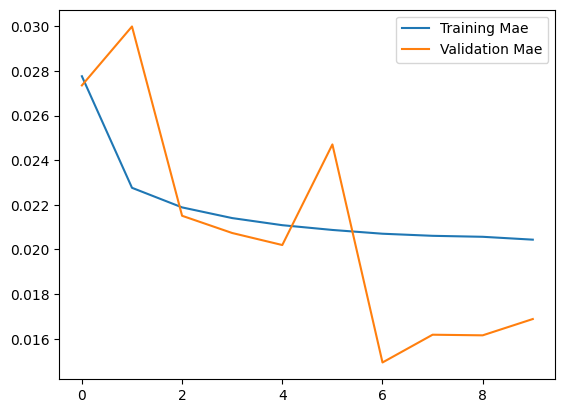

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 73s 5ms/step


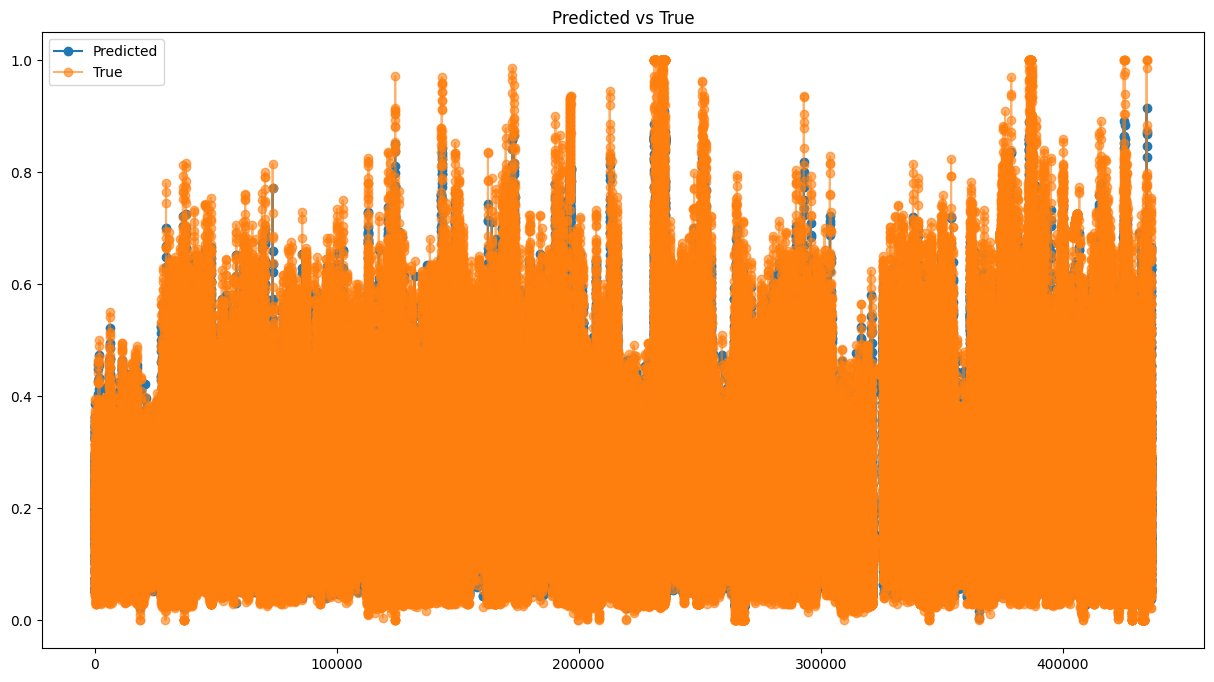

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.01735525082734802,
 'mse': 0.02520851668563019,
 'rmse': 0.0006354693134896956}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral/bidirectional_NO_dropout.h5')

Epoch 1/50
14045/14045 [==============================] - 234s 16ms/step - loss: 3.5745e-04 - mae: 0.0115 - mse: 3.5745e-04 - val_loss: 2.4214e-04 - val_mae: 0.0106 - val_mse: 2.4214e-04
Epoch 2/50
14045/14045 [==============================] - 228s 16ms/step - loss: 1.7195e-04 - mae: 0.0080 - mse: 1.7195e-04 - val_loss: 1.9519e-04 - val_mae: 0.0086 - val_mse: 1.9519e-04
Epoch 3/50
14045/14045 [==============================] - 232s 17ms/step - loss: 1.6410e-04 - mae: 0.0077 - mse: 1.6410e-04 - val_loss: 1.9123e-04 - val_mae: 0.0085 - val_mse: 1.9123e-04
Epoch 4/50
14045/14045 [==============================] - 232s 17ms/step - loss: 1.6086e-04 - mae: 0.0076 - mse: 1.6086e-04 - val_loss: 1.8838e-04 - val_mae: 0.0084 - val_mse: 1.8838e-04
Epoch 5/50
14045/14045 [==============================] - 251s 18ms/step - loss: 1.5957e-04 - mae: 0.0076 - mse: 1.5957e-04 - val_loss: 1.8799e-04 - val_mae: 0.0084 - val_mse: 1.8799e-04


13644/13644 [==============================] - 89s 7ms/step - loss: 2.7977e-04 - mae: 0.0109 - mse: 2.7977e-04
test loss, test acc: [0.00027977058198302984, 0.010878740809857845, 0.00027977058198302984]


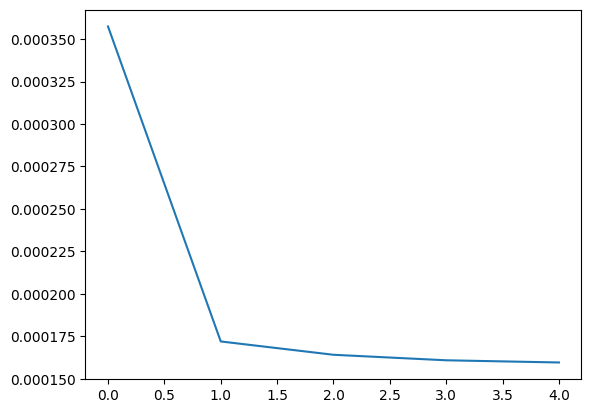

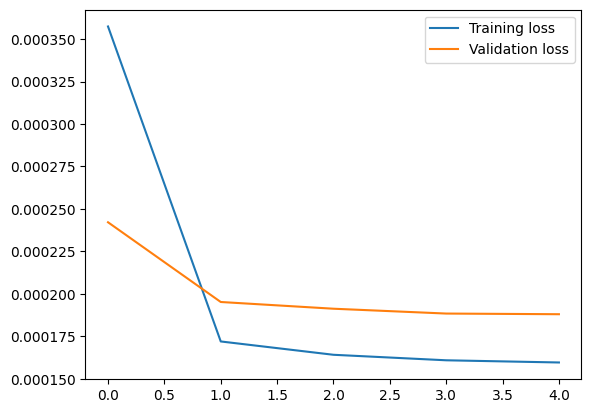

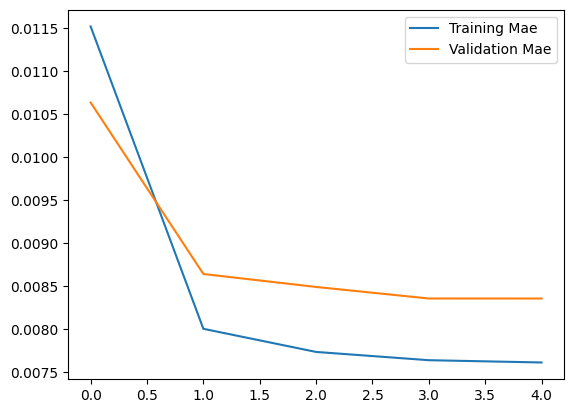

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 83s 6ms/step


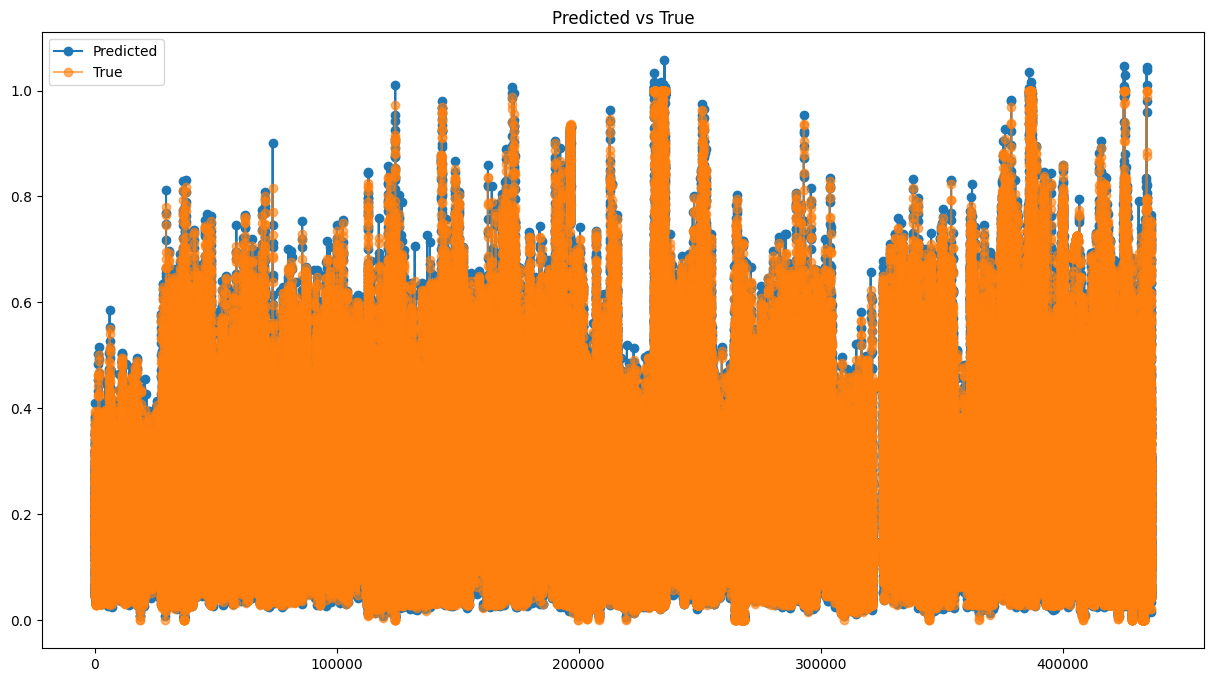

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.01087873729924856,
 'mse': 0.01672633879009067,
 'rmse': 0.00027977040932089184}